In [1]:
import os

# Set Hugging Face cache to D: drive
os.environ["HF_HOME"] = "D:/huggingface_cache"


In [2]:
!pip install torch torchvision torchaudio
!pip install tensorflow opencv-python pillow nltk spacy matplotlib streamlit
!python -m spacy download en_core_web_sm




     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---- ----------------------------------- 1.6/12.8 MB 9.4 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.8 MB 7.2 MB/s eta 0:00:02
     ------------ --------------------------- 3.9/12.8 MB 6.6 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.8 MB 6.3 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 6.2 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 6.1 MB/s eta 0:00:01
     --------------------------- ------------ 8.7/12.8 MB 6.0 MB/s eta 0:00:01
     ------------------------------- -------- 10.0/12.8 MB 6.0 MB/s eta 0:00:01
     ---------------------------------- ----- 11.0/12.8 MB 5.8 MB/s eta 0:00:01
     -------------------------------------- - 12.3/12.8 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 5.8 MB/s  0:00:02
[+] Download and installation successful
You can now load 

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt


nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
pip install --upgrade jupyter ipywidgets


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 2.8 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 2.8 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 2.8 MB/s  0:00:00

   ---------------------------------------- 0/5 [widgetsnbextension]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ---------------- ----------------------- 2/5 [ipywidgets]
   ------------------------ --------------- 3/5 [jupyter-console]
   ------------------------ --------------- 3/5 [jupyter-console]
 

In [12]:
!pip install transformers

from transformers import BlipProcessor, BlipForConditionalGeneration

# Load BLIP model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
caption_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    inputs = processor(raw_image, return_tensors="pt")
    out = caption_model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption

# Test with your image
image_path = "D:/images/dog.jpg"  # Use forward slashes or double backslashes
 # replace with your image file
print("Caption:", generate_caption(image_path))


Fetching 1 files: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 8577.31it/s]


Caption: a man in a blue shirt standing in front of a building


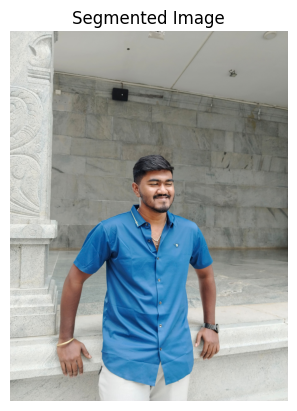

[{'boxes': tensor([[ 440.9659, 1372.2089, 2391.8293, 4100.5210],
          [1148.7290,  643.3475, 1332.3821,  789.2155],
          [  25.7175, 2091.3079,  544.5533, 2887.2876],
          [2452.8569,  432.8485, 2534.9841,  502.1961],
          [1310.2712,  192.2880, 1345.0348,  219.1215],
          [2449.0857,  429.4438, 2544.7329,  519.7920],
          [2469.6238,  448.2902, 2544.9927,  513.5762]]),
  'labels': tensor([ 1, 33, 15, 16, 16, 38, 16]),
  'scores': tensor([0.9998, 0.8896, 0.3420, 0.3337, 0.1977, 0.1002, 0.0519]),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0

In [13]:
seg_model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
seg_model.eval()

transform = transforms.Compose([transforms.ToTensor()])

def segment_image(image_path, threshold=0.5):
    img = Image.open(image_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0)

    with torch.no_grad():
        pred = seg_model(img_tensor)

    plt.imshow(img)
    plt.axis("off")
    plt.title("Segmented Image")
    plt.show()

    return pred

# Test segmentation
segment_image(image_path)


Generated Caption: a man in a blue shirt standing in front of a building


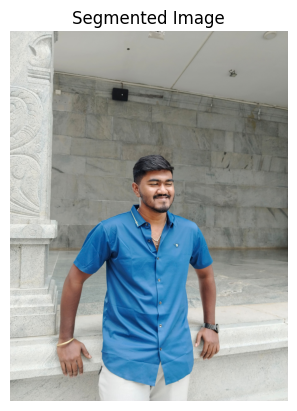

In [14]:
def caption_and_segment(image_path):
    caption = generate_caption(image_path)
    print("Generated Caption:", caption)
    segment_image(image_path)

caption_and_segment("D:/images/dog.jpg")
